#Fix the bad deep values in the initial field due to the old bottom boundary

In [71]:
import glob
import datetime
import scipy.io
import numpy as np
import netCDF4 as nc
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [23]:
sb.set_style('white')

In [74]:
obj = nc.Dataset('/ocean/yingkai/GEOTRACES/Simulations/SPIN06_00350640_restart_trc.nc', 'r+')
Ba = obj.variables['TRNBa'][:]
d18O = obj.variables['TRNd18O'][:]
nav_lon = obj.variables['nav_lon'][:]
nav_lat = obj.variables['nav_lat'][:]

In [75]:
obj_ref = nc.Dataset('/ocean/yingkai/GEOTRACES/Simulations/EXP002_00043800_restart_trc.nc', 'r+')
Ba_ref = obj_ref.variables['TRNBa'][:]
d18O_ref = obj_ref.variables['TRNd18O'][:]

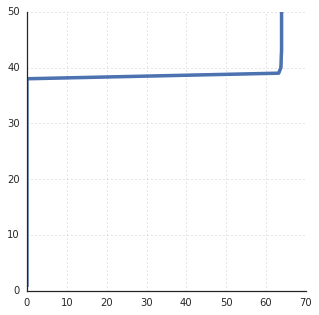

In [37]:
fig = plt.figure(figsize=(5, 5)); ax = fig.gca()
ax = fig.gca(); 
ax.grid(linestyle=':'); #ax.xaxis.grid(False)
ax.spines["top"].set_visible(False)
#ax.spines["bottom"].set_visible(False) 
ax.spines["right"].set_visible(False)

ax.plot(Ba[0, :, 700, 400], np.arange(50, 0, -1), lw=3.5, solid_capstyle='projecting')

In [38]:
Ba.shape

(1, 50, 800, 544)

In [76]:
#for i in range(800):
#    for j in range(544):
#        for k in range(49):
#            if ((Ba[0, k, i, j]>0) and (Ba[0, k+1, i, j]==0) and (Ba_ref[0, k+1, i, j]>0)):
#                print('k2={}'.format(k))
#                for k2 in range(k, 50):
#                    Ba[0, k2, i, j] = Ba[0, k, i, j]
Ba[0, 38:, :, :]=Ba_ref[0, 38:, :, :]
d18O[0, 38:, :, :]=d18O_ref[0, 38:, :, :]

In [51]:
lev1 = np.arange(35, 95, 5)

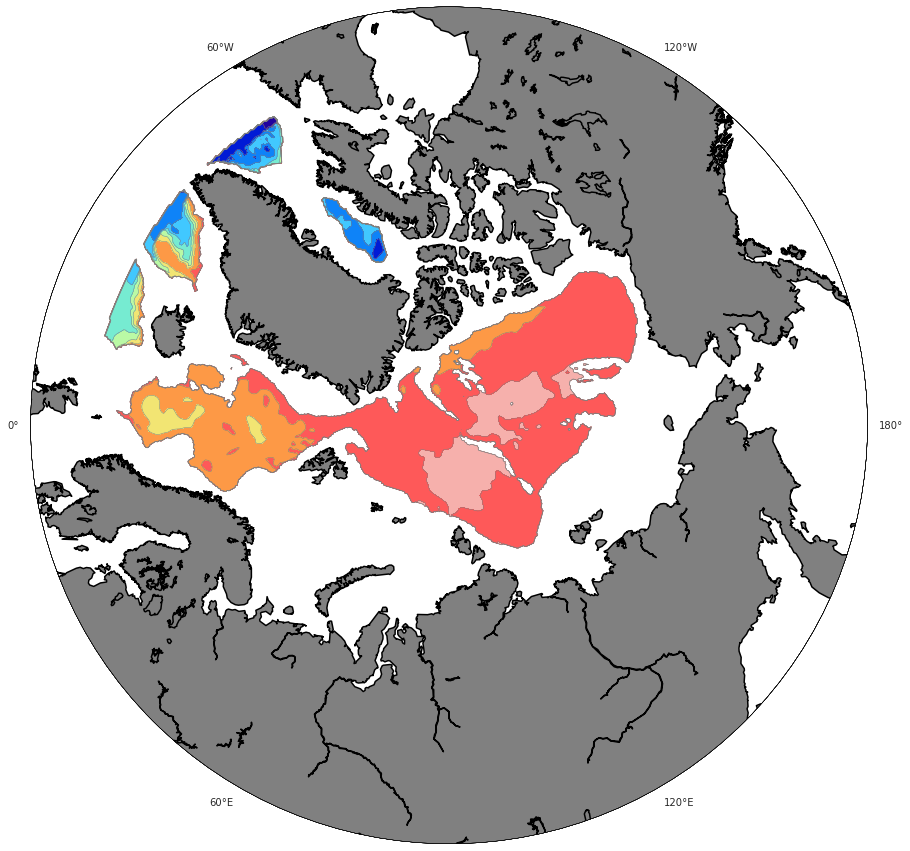

In [69]:
fig=plt.figure(figsize=(15, 15));
ax = fig.gca()

proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, Ba[0, 38, :, :], lev1, cmap=cm.GMT_haxby_r, extend='both')
proj.contour(x, y, Ba[0, 38, :, :], lev1, linewidths=0.5, colors=('gray',))

In [81]:
save_var = { 'nav_lon' : np.squeeze(nav_lon),\
             'nav_lat' : np.squeeze(nav_lat),\
             'Ba_ini'  : np.squeeze(Ba),\
             'd18O_ini': np.squeeze(d18O)
            }
scipy.io.savemat('../../_data/Exchange/ANHA4_ini_latest.mat', mdict=save_var)